In [76]:
%matplotlib inline

import gmodel
import makepredictions
import datetime, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde

In [77]:
company = 'SPY'
num_states = 5
num_tests = 200 #20000 seems to be ideal compromise between quality and time to compute
days_into_future = 364

#now = datetime.datetime.now()
#datetime.date(now.year, now.month, now.day)
date1 = datetime.date(2005, 1, 1)
date2 = datetime.date(2015, 1, 1)

In [78]:
gmodel.cmodel(company,date1,date2,num_states)

In [79]:
d1 = datetime.date(2015, 1, 1)
d2 = datetime.date(2015, 7, 1)

In [80]:
#s = pd.Series([1,3,5,np.nan,6,8])
real = makepredictions.getrealprice(company, d2, days_into_future)

In [81]:
results1 = np.array(makepredictions.predictions_mls(company+"_"+str(num_states)+"_states_model.pkl", company, d1, 
                                                   d2, num_states, num_tests,days_into_future))
#print (results1)
#print (np.average(results1))

364


In [82]:
results2 = np.array(makepredictions.predictions_rand(company+"_"+str(num_states)+"_states_model.pkl", company, d1, 
                                                    d2, num_states, num_tests,days_into_future))
#print (results2)
#print (np.average(results2))

364


In [83]:
results3 = np.array(makepredictions.predictions_vtr(company+"_"+str(num_states)+"_states_model.pkl", company, d1, 
                                                   d2, num_states, num_tests,days_into_future))
#print (results3)
#print (np.average(results3))

364


In [84]:
results4 = np.array(makepredictions.predictions_psd(company+"_"+str(num_states)+"_states_model.pkl", company, d1, 
                                                   d2, num_states, num_tests,days_into_future))
#print (results3)
#print (np.average(results3))

364


In [85]:
pd.options.display.float_format = '{:,.5f}'.format

In [86]:
df1 = pd.DataFrame({ 
                    'A' : num_states,
                    'B' : pd.Categorical(results1.size*["MLS"]),
                    'C' : days_into_future,
                    'D' : results1,
                    'E' : real,
                    'F' : results1 - real
                     })

In [87]:
df1.head(4)

,A,B,C,D,E,F
0,5,MLS,364,185.89489,206.66000,-20.76512
1,5,MLS,364,202.29254,206.66000,-4.36746
2,5,MLS,364,209.20087,206.66000,2.54087
3,5,MLS,364,157.24731,206.66000,-49.41270


In [88]:
df1.describe()

,A,C,D,E,F
count,"50,000.00000","50,000.00000","50,000.00000","50,000.00000","50,000.00000"
mean,5.00000,364.00000,212.33723,206.66000,5.67723
std,0.00000,0.00000,30.77685,0.00000,30.77685
min,5.00000,364.00000,46.95989,206.66000,-159.70012
25%,5.00000,364.00000,193.40062,206.66000,-13.25938
50%,5.00000,364.00000,214.69536,206.66000,8.03535
75%,5.00000,364.00000,233.68552,206.66000,27.02551
max,5.00000,364.00000,318.36544,206.66000,111.70544


In [89]:
df2 = pd.DataFrame({ 
                    'A' : num_states,
                    'B' : pd.Categorical(results2.size*["Rand"]),
                    'C' : days_into_future,
                    'D' : results2,
                    'E' : real,
                    'F' : results2 - real
                     })

In [90]:
df2.head(4)

,A,B,C,D,E,F
0,5,Rand,364,228.51759,206.66000,21.85758
1,5,Rand,364,197.53084,206.66000,-9.12916
2,5,Rand,364,278.58046,206.66000,71.92045
3,5,Rand,364,211.00249,206.66000,4.34248


In [91]:
df2.describe()

,A,C,D,E,F
count,"50,000.00000","50,000.00000","50,000.00000","50,000.00000","50,000.00000"
mean,5.00000,364.00000,216.79800,206.66000,10.13799
std,0.00000,0.00000,29.42693,0.00000,29.42693
min,5.00000,364.00000,16.63204,206.66000,-190.02797
25%,5.00000,364.00000,199.17118,206.66000,-7.48882
50%,5.00000,364.00000,219.43627,206.66000,12.77626
75%,5.00000,364.00000,237.21691,206.66000,30.55691
max,5.00000,364.00000,329.85015,206.66000,123.19015


In [92]:
df3 = pd.DataFrame({ 
                    'A' : num_states,
                    'B' : pd.Categorical(results3.size*["Rand"]),
                    'C' : days_into_future,
                    'D' : results3,
                    'E' : real,
                    'F' : results3 - real
                     })

In [93]:
df3.head(3)

,A,B,C,D,E,F
0,5,Rand,364,192.52090,206.66000,-14.13910
1,5,Rand,364,249.90422,206.66000,43.24421
2,5,Rand,364,204.17480,206.66000,-2.48520


In [94]:
df3.describe()

,A,C,D,E,F
count,"50,000.00000","50,000.00000","50,000.00000","50,000.00000","50,000.00000"
mean,5.00000,364.00000,212.43611,206.66000,5.77611
std,0.00000,0.00000,30.74605,0.00000,30.74605
min,5.00000,364.00000,46.83902,206.66000,-159.82098
25%,5.00000,364.00000,193.66869,206.66000,-12.99131
50%,5.00000,364.00000,214.83687,206.66000,8.17687
75%,5.00000,364.00000,233.86853,206.66000,27.20852
max,5.00000,364.00000,324.15006,206.66000,117.49005


In [95]:
df4 = pd.DataFrame({ 
                    'A' : num_states,
                    'B' : pd.Categorical(results4.size*["Rand"]),
                    'C' : days_into_future,
                    'D' : results4,
                    'E' : real,
                    'F' : results4 - real
                     })

In [96]:
df4.head(3)

,A,B,C,D,E,F
0,5,Rand,364,226.55399,206.66000,19.89399
1,5,Rand,364,253.88903,206.66000,47.22903
2,5,Rand,364,241.78462,206.66000,35.12462


In [97]:
df4.describe()

,A,C,D,E,F
count,"50,000.00000","50,000.00000","50,000.00000","50,000.00000","50,000.00000"
mean,5.00000,364.00000,215.67708,206.66000,9.01708
std,0.00000,0.00000,29.69843,0.00000,29.69843
min,5.00000,364.00000,55.75335,206.66000,-150.90665
25%,5.00000,364.00000,197.76564,206.66000,-8.89436
50%,5.00000,364.00000,218.28945,206.66000,11.62944
75%,5.00000,364.00000,236.29729,206.66000,29.63728
max,5.00000,364.00000,314.34596,206.66000,107.68595


array([[<matplotlib.axes.AxesSubplot object at 0x121C3530>]], dtype=object)

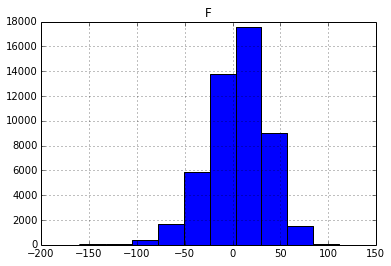

In [98]:
df1.hist(5)

array([[<matplotlib.axes.AxesSubplot object at 0x11CC99F0>]], dtype=object)

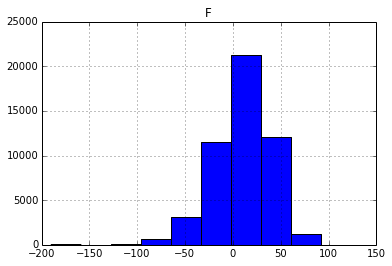

In [99]:
df2.hist(5)

array([[<matplotlib.axes.AxesSubplot object at 0x120B4B70>]], dtype=object)

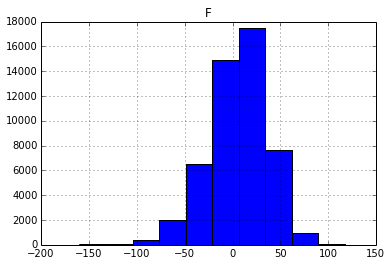

In [100]:
df3.hist(5)

array([[<matplotlib.axes.AxesSubplot object at 0x1253E490>]], dtype=object)

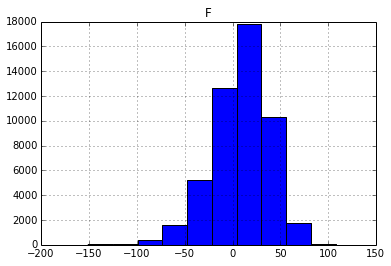

In [101]:
df4.hist(5)

In [102]:
samp1 = df1['D'].values
samp2 = df2['D'].values
samp3 = df3['D'].values
samp4 = df4['D'].values

df1_pdf = gaussian_kde(samp1)
df2_pdf = gaussian_kde(samp2)
df3_pdf = gaussian_kde(samp3)
df4_pdf = gaussian_kde(samp4)

In [103]:
x = np.linspace(np.amin(df1['D'].values),np.amax(df1['D'].values)*.77,200)

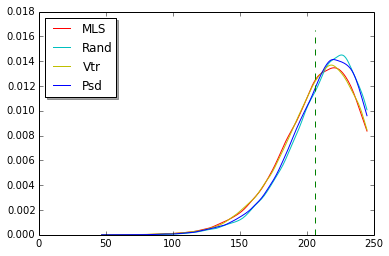

In [104]:
# plotting the result

plt.plot(x,df1_pdf(x),'r', label='MLS') # distribution function
plt.plot(x,df2_pdf(x),'c', label='Rand') # distribution function
plt.plot(x,df3_pdf(x),'y', label='Vtr') # distribution function
plt.plot(x,df4_pdf(x),'b', label='Psd') # distribution function
plt.plot((real, real), (0, df1_pdf(real)+.004), 'g--')
#hist(samp,normed=1,alpha=.3) # histogram
plt.legend(loc='best', shadow=True)
plt.show()

In [105]:
print ("True Value: ",real)
print ("MLS",df1_pdf(real)[0], "Rand",df2_pdf(real)[0], "Vtr",df3_pdf(real)[0], "Psd",df4_pdf(real)[0])
kdes = np.array([df1_pdf(real)[0], df2_pdf(real)[0], df3_pdf(real)[0], df4_pdf(real)[0]])
rank = np.argsort(-1*kdes) + 1
print (rank)

('True Value: ', 206.66000399999999)
('MLS', 0.012507502326964379, 'Rand', 0.011596410054399844, 'Vtr', 0.012414647002155997, 'Psd', 0.011876849331816855)
[1 3 4 2]


In [106]:
dfkde = pd.DataFrame({ 
                    'A' : company,
                    'B' : num_states,
                    'C' : pd.Categorical(["MLS", "Rand","Vtr","Psd"]),
                    'D' : days_into_future,
                    'E' : kdes,
                    'F' : rank,
                     })

In [107]:
dfkde

,A,B,C,D,E,F
0,SPY,5,MLS,364,0.01251,1
1,SPY,5,Rand,364,0.01160,3
2,SPY,5,Vtr,364,0.01241,4
3,SPY,5,Psd,364,0.01188,2


In [110]:
fname = company +"_"+ str(num_states) + "_" + str(days_into_future) + "_kdes"
dfkde.to_csv(fname+".csv")
#pd.read_csv('foo.csv')
dfkde.to_excel(fname + '.xlsx', sheet_name='Sheet1')